In [4]:
import sys
sys.path.append('..')
import numpy as np
from produce_maps_gaston.tcrit import data_both_biomes
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from utils import geo_slices, dense_vegetation, slice_tropics, version, DATA_PATH

from matplotlib import colors
import matplotlib.ticker as mticker
import rasterio as rio
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colormaps

terra = rio.open(DATA_PATH + "/terraaqua.tif", 'r').read(1)
d_ext = {"South America": "south_america",  "Africa": "africa", "SE Asia": "south_east_asia"}
d_ext = {value: key for key, value in d_ext.items()}

# Relies on outputs of slope.py

In [5]:
mask = np.zeros_like(data_both_biomes).astype(float)
mask[:,:] = np.nan
for key, sl in geo_slices.items():
    ext = key
        
    lr_outfile = DATA_PATH + f"/outputs_gaston/delta_Tmean_Tmodis{ext}_per_year_2001_2020_reversed{version}.npy" # _reversed _tminv5
    lr_map = - np.load(lr_outfile)[...,-1]
    lr_map[~data_both_biomes[sl]] = np.nan
    lr_map[~dense_vegetation[sl]] = np.nan
    mask[sl] = lr_map
final_map =  mask[slice_tropics]

In [7]:
np.nanquantile(final_map, [0.1,0.25,0.5,0.75,0.9])

array([ 3.42914543,  8.6900034 , 12.64622974, 14.97665787, 16.60335732])

-14 1051


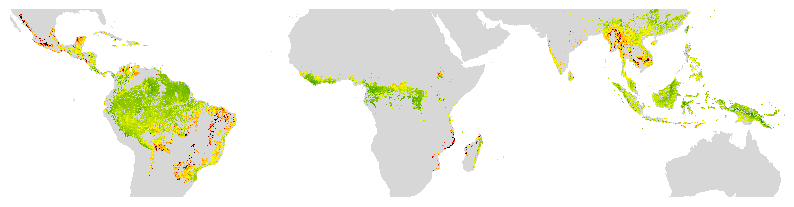

In [10]:

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    reg_index = np.linspace(start, stop, 257)

    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)

    return newcmap


def make_fig_(data_species, figsize=(10,5), minn=0, maxx=0,sl=None, interpolation="none", title_fig=None, is_hansen=False, cmap_='brg',save_title=None):
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    cmap_terra = colors.ListedColormap(['white', '#D7D7D7FF'])
    img = terra[sl].squeeze()
    ax.imshow(img, cmap=cmap_terra)
    cmap_species = cmap_
    cmap_species.set_bad(alpha=0)
    d = data_species.squeeze().copy()
    im = ax.imshow(d, cmap=cmap_species, interpolation=interpolation)
    min_cbar = int(np.nanmin(d)) 
    max_species = int(np.nanmax(d))
    print(min_cbar, max_species)
    min_cbar = minn
    max_species = maxx
    im.set_clim(min_cbar, max_species)
    ax.set_axis_off()
        
# cmap_final = colormaps["hot"] # Reds_r
colors_ = [(0, 0, 0), (1, 0, 0), (1, 1, 0), (0, 0.5, 0)]
n_bins = 100  
cmap_final = LinearSegmentedColormap.from_list('custom_hot', colors_, N=n_bins)
minn = -5
maxx = 25
midpoint=(-minn)/(maxx - minn)
cmap_final = shiftedColorMap(cmap_final, midpoint=midpoint, name='shifted')
make_fig_(final_map, interpolation='none', sl=slice_tropics, cmap_=cmap_final, minn=minn, maxx=maxx)
# plt.savefig("../figures/Figure1/TSM2020/tropics_shift.png", bbox_inches='tight')

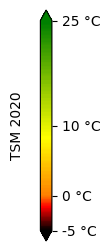

In [4]:
tropics_sl_ = np.random.rand(10, 10)
def make_fig_cbar(data_species, figsize=(2, 4), sl=None, interpolation="none", cmap_='brg'):
    fig2 = plt.figure(figsize=(2, 3))
    ax2 = fig2.gca()
    cmap_species = cmap_
    im2 = ax2.imshow(data_species.squeeze(), cmap=cmap_species, interpolation=interpolation)
    min_cbar = minn
    max_species = maxx
    im2.set_clim(min_cbar, max_species)
    im2.set_visible(False)
    cbar2 = fig2.colorbar(im2,
                        ticks=[min_cbar, 0, 10, max_species],
                        format=mticker.FixedFormatter([f'{min_cbar} °C', '0 °C', '10 °C', f'{max_species} °C']),
                        extend='both'
                        )
    ax2.remove()
    cbar2.ax.set_ylabel('TSM 2020', rotation=90, labelpad=-55, va='bottom')
    
    
cmap_final = colormaps["hot"]
cmap_final = shiftedColorMap(cmap_final, midpoint=4/(34- (-4)), name='shifted')

colors_ = [(0, 0, 0), (1, 0, 0), (1, 1, 0), (0, 0.5, 0)] 
n_bins = 100 
cmap_final = LinearSegmentedColormap.from_list('custom_hot', colors_, N=n_bins)

cmap_final = shiftedColorMap(cmap_final, midpoint=midpoint, name='shifted')

make_fig_cbar(final_map, interpolation='none', sl=tropics_sl_, cmap_=cmap_final)
plt.savefig("../figures/Figure1/TSM2020/cbar_shift.png", bbox_inches='tight')


In [5]:
mask = np.zeros_like(data_both_biomes).astype(float)
mask[:,:] = np.nan
for key, sl in d_sl.items():
    ext = key
    lr_outfile = DATA_PATH + f"/outputs/LinearRegression_delta_Tmean_Tmodis{ext}_per_year_2001_2020{version}.npy"
    lr_map = - np.load(lr_outfile)
    lr_map[~data_both_biomes[sl]] = np.nan
    lr_map[~dense_vegetation[sl]] = np.nan
    mask[sl] = lr_map
print(np.nanmean(mask))

-0.036688060955461683


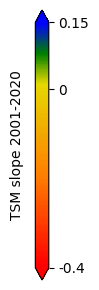

In [6]:
fig2 = plt.figure(figsize=(2, 3))
ax2 = fig2.gca()
rng = np.random.default_rng(seed=19680801)
data = rng.standard_normal((250, 250))

colors_ = [(1, 0, 0), (1,0.5,0), (0.9, 0.85, 0), (0, 0.5, 0), (0,0,1)]
n_bins = 100 
cmap_species = LinearSegmentedColormap.from_list('custom', colors_, N=n_bins)
cmap_species = shiftedColorMap(cmap_species, midpoint=0.75, name='shifted')

min_cbar = -0.4
max_cbar = 0.15


im2 = ax2.imshow(data, cmap=cmap_species, vmin=min_cbar, vmax=max_cbar)

im2.set_clim(min_cbar, max_cbar)
im2.set_visible(False)
cbar2 = fig2.colorbar(im2,
                    ticks=[min_cbar, 0, max_cbar],
                    format=mticker.FixedFormatter([f'{min_cbar}', '0', f'{max_cbar}']),
                    extend='both'
                    )
ax2.remove()
cbar2.ax.set_ylabel('TSM slope 2001-2020', rotation=90, labelpad=-47, va='bottom')
plt.tight_layout()
plt.savefig("../figures/Figure1/LRmaps/cbar_diverging.png", bbox_inches='tight')

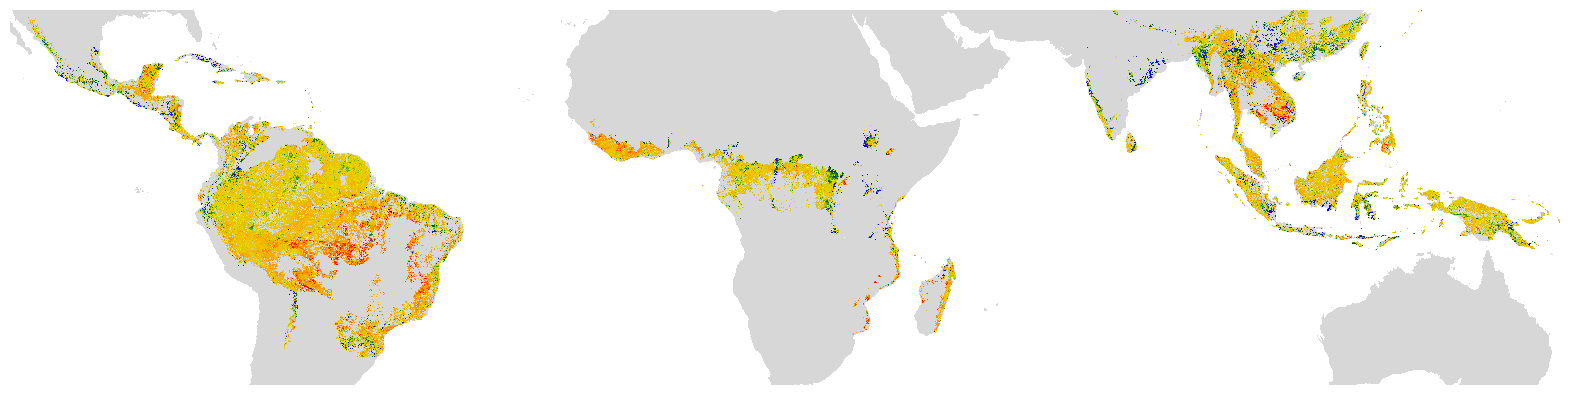

In [7]:

lr_map = mask
sl = sl_tropics
lr_map = lr_map[sl]
cmap_terra = colors.ListedColormap(['white', '#D7D7D7FF']) 

fig = plt.figure(figsize=(20,10))
ax = fig.gca()

img = terra[sl].squeeze()
ax.imshow(img, cmap=cmap_terra)


im = ax.imshow(lr_map, cmap=cmap_species, interpolation='none')
im.set_clim(min_cbar, max_cbar)

ax.set_axis_off()
plt.savefig("../figures/Figure1/LRmaps/tropics_diverging.png", bbox_inches='tight')